In [65]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
import pprint
import glob
import sys
from pprint import pformat

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
root_dir = os.curdir
max_nest = 10  # arbitrary, 3 would probably suffice
nest = 0
while "src" not in os.listdir(root_dir) and nest < max_nest:
    # Look up the directory structure for a src directory
    root_dir = os.path.join(os.pardir, root_dir)
    nest += 1

# If you don't find the src directory, the root directory is this directory
root_dir = os.path.abspath(root_dir) if nest < max_nest else os.path.abspath(
    os.curdir)

# Get the source directory and append path to access
# python packages/scripts within directory
if "src" in os.listdir(root_dir):
    src_dir = os.path.join(root_dir)
    sys.path.append(src_dir)

In [53]:
import sqlite3
import datetime

def get_counts(mid):
    
    conn = sqlite3.connect('../data/interim/temp_graph.db')

    statement = f"""SELECT entity_counts.occCount, entity_counts.my_date FROM entity_counts 
    JOIN entities ON entity_counts.entity_1 = entities.mid
    WHERE entity_counts.entity_1 = '{mid}' AND (entity_counts.my_date > '2018-01-01' AND entity_counts.my_date < '2018-12-31')
    ORDER BY my_date ASC"""

    cursor = conn.execute(statement)

    occurances = list(cursor.fetchall())
    occurances = [(occ[0], datetime.datetime.strptime(occ[1], '%Y-%m-%d')) for occ in occurances]

    print(a)
    conn.close()
    
    return occurances



In [55]:

occurances_fifa = get_counts("/m/06qjc4")
occurances_modric = get_counts("/m/08p1qm")


[('2018-01-02', '2018 FIFA World Cup'), ('2018-01-05', '2018 FIFA World Cup'), ('2018-01-06', '2018 FIFA World Cup'), ('2018-01-07', '2018 FIFA World Cup'), ('2018-01-08', '2018 FIFA World Cup'), ('2018-01-09', '2018 FIFA World Cup'), ('2018-01-10', '2018 FIFA World Cup'), ('2018-01-11', '2018 FIFA World Cup'), ('2018-01-12', '2018 FIFA World Cup'), ('2018-01-13', '2018 FIFA World Cup'), ('2018-01-14', '2018 FIFA World Cup'), ('2018-01-16', '2018 FIFA World Cup'), ('2018-01-17', '2018 FIFA World Cup'), ('2018-01-18', '2018 FIFA World Cup'), ('2018-01-19', '2018 FIFA World Cup'), ('2018-01-20', '2018 FIFA World Cup'), ('2018-01-21', '2018 FIFA World Cup'), ('2018-01-22', '2018 FIFA World Cup'), ('2018-01-23', '2018 FIFA World Cup'), ('2018-01-24', '2018 FIFA World Cup'), ('2018-01-25', '2018 FIFA World Cup'), ('2018-01-26', '2018 FIFA World Cup'), ('2018-01-27', '2018 FIFA World Cup'), ('2018-01-28', '2018 FIFA World Cup'), ('2018-01-29', '2018 FIFA World Cup'), ('2018-01-31', '2018 FIF

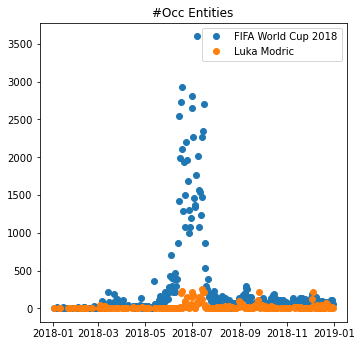

In [71]:
plt.plot_date(x=[occ[1] for occ in occurances_fifa], y=[occ[0] for occ in occurances_fifa], ydate=False)
plt.plot_date(x=[occ[1] for occ in occurances_modric], y=[occ[0] for occ in occurances_modric], ydate=False)
plt.title("#Occ Entities")
plt.legend(["FIFA World Cup 2018", "Luka Modric"])

fig = plt.gcf()
fig.set_size_inches(5.5, 5.5)
fig.savefig('../reports/temp_graph_praesi/images/mordic_fifa.png', dpi=600)
plt.show()